In [4]:
# Here we load the libraries required for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

In [5]:
# Here we laod the dataset. Please change the path of the file here
filepath = r'C:\Users\admin\Downloads\Country-data.csv'
country_df = pd.read_csv(filepath, sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Here we check the basic details of the df.
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


In [7]:
# Here we are checking missing values, we can see that there are no missing values in the dataset
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [8]:
# Finding the shape of the df
country_df.shape

(167, 10)

In [9]:
#Here we are converting the columns with % values into absolute values
country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

In [10]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Now, we will peform PCA 

In [11]:
country_id = country_df['country']

In [12]:
country_df_1 = country_df.drop('country',axis=1)

In [13]:
country_df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
# Here we standardise the values of the columns
scaler = StandardScaler()
country_df_2 = scaler.fit_transform(country_df_1)

In [15]:
country_df_2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [16]:
# Import  PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized' , random_state = 42)
pca.fit(country_df_2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

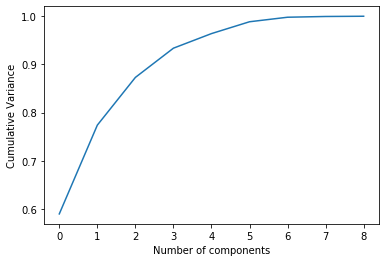

In [17]:
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.show()

In [18]:
# From the above graph, we will consider n_components = 4 because it explains more than 90% of the variance

In [19]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)
df_pca = pca_final.fit_transform(country_df_2)

In [20]:
pca_df2 = pd.DataFrame(df_pca)
pca_df2.columns = ['PC1','PC2','PC3','PC4']
pca_df2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


## We will perform Outlier treatment to the data

In [21]:
pca_df2 = pd.concat([country_id,pca_df2], axis = 1)

{'whiskers': [<matplotlib.lines.Line2D at 0xb91b290>,
 'caps': [<matplotlib.lines.Line2D at 0xb91b730>,
 'boxes': [<matplotlib.lines.Line2D at 0xb90aed0>],
 'medians': [<matplotlib.lines.Line2D at 0xb91bc50>],
 'fliers': [<matplotlib.lines.Line2D at 0xb91be70>],
 'means': []}

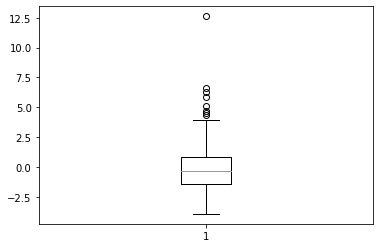

In [22]:
plt.boxplot(pca_df2.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0xb8859f0>,
 'caps': [<matplotlib.lines.Line2D at 0xb8855b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb885170>],
 'medians': [<matplotlib.lines.Line2D at 0xb885c90>],
 'fliers': [<matplotlib.lines.Line2D at 0xb89a410>],
 'means': []}

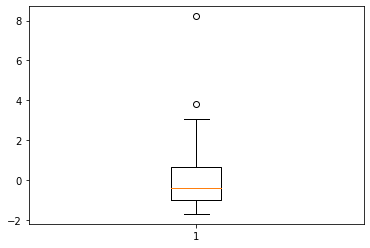

In [23]:
plt.boxplot(pca_df2.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0xb9428b0>,
 'caps': [<matplotlib.lines.Line2D at 0xb9429b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb8643b0>],
 'medians': [<matplotlib.lines.Line2D at 0xb942ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb864590>],
 'means': []}

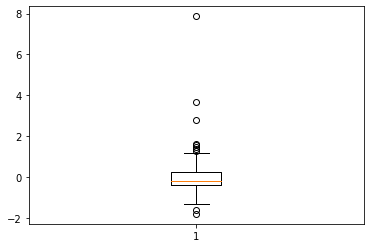

In [24]:
plt.boxplot(pca_df2.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0xb98b370>,
 'caps': [<matplotlib.lines.Line2D at 0xb98b890>,
 'boxes': [<matplotlib.lines.Line2D at 0xb98b150>],
 'medians': [<matplotlib.lines.Line2D at 0xb98bdb0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb97dff0>],
 'means': []}

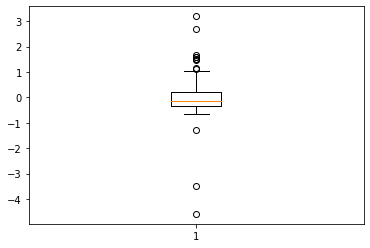

In [25]:
plt.boxplot(pca_df2.PC4)

In [26]:
# For PC1
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]

In [27]:
# For PC2
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
pca_df2 = pca_df2[(pca_df2.PC2 >= Q1) & (pca_df2.PC2 <= Q3)]

In [28]:
# For PC3
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
pca_df2 = pca_df2[(pca_df2.PC3 >= Q1) & (pca_df2.PC3 <= Q3)]

In [29]:
# For PC4
Q1 = pca_df2.PC4.quantile(0.05)
Q3 = pca_df2.PC4.quantile(0.95)
pca_df2 = pca_df2[(pca_df2.PC4 >= Q1) & (pca_df2.PC4 <= Q3)]

In [30]:
pca_df2.shape

(107, 5)

In [31]:
# Here we will visualize the data using 2 Principal Components

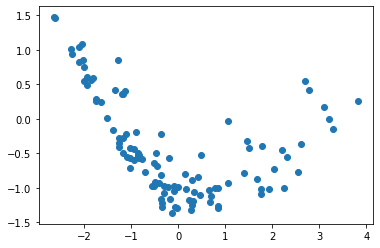

In [32]:
plt.scatter(x = 'PC1', y = 'PC2', data = pca_df2)

In [33]:
pca_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513
6,Armenia,-0.334274,-1.279033,0.190772,-0.501435
8,Austria,3.818137,0.262614,-0.297336,0.974405


In [34]:
# Here we are defining Hopkins score method

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(pca_df2.drop(['country'], axis = 1))

0.7467003278823945

In [36]:
# From the above Hopkin score, we can say that the dataset is okay for clustering

In [37]:
# Next, we need to check the optimal K.
# We can use Silhouette score and Elbow curve to find the optimal K

In [38]:
dat3_1 = pca_df2.drop(['country'], axis = 1).copy()
dat3_1.shape

(107, 4)

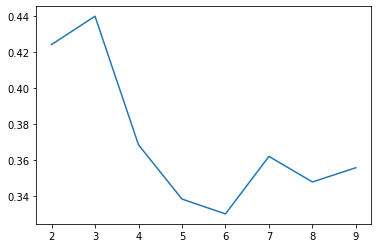

In [39]:
sil = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    sil.append([k, silhouette_score(dat3_1, kmeans.labels_)])
plt.plot(pd.DataFrame(sil)[0], pd.DataFrame(sil)[1])

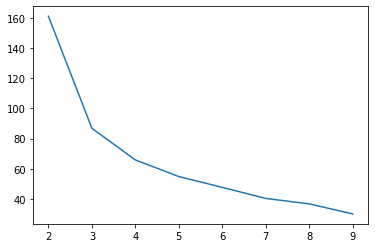

In [40]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [41]:
# From the above graphs, we can say that 3 is a good number

In [42]:
model_clus3 = KMeans(n_clusters = 3, random_state = 50)
model_clus3.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [43]:
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis=1), pd.Series(model_clus3.labels_).reset_index().drop('index', axis=1)], axis = 1)


In [44]:
dat_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterId']
dat_km.head()

,country,PC1,PC2,PC3,PC4,ClusterId
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,-0.334274,-1.279033,0.190772,-0.501435,1
4,Austria,3.818137,0.262614,-0.297336,0.974405,2


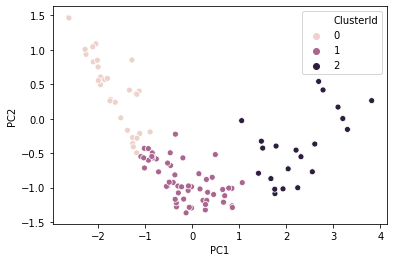

In [45]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterId', data = dat_km)

In [46]:
# We will merge this data with our original data to do profiling

In [47]:
dat5 = pd.merge(country_df, dat_km, how = 'inner', on = 'country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterId
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334274,-1.279033,0.190772,-0.501435,1
4,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,3.818137,0.262614,-0.297336,0.974405,2


In [48]:
dat5.drop(['PC1','PC2','PC3','PC4'], axis = 1, inplace = True)

In [49]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
4,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,2


In [50]:
# Check count of observations in each cluster
dat5.ClusterId.value_counts()

1    55
0    31
2    21
Name: ClusterId, dtype: int64

In [51]:
dat5.groupby('ClusterId')[['gdpp','child_mort','income']].mean()

,gdpp,child_mort,income
ClusterId,,,
0,2072.161290,63.651613,4450.000000
1,6467.418182,20.894545,12297.636364
2,30957.142857,5.738095,36833.333333


In [63]:
#From the above we can see that cluster 0 has less gdpp, more child_mort and less income compared to other clusters

# Hierarchical Clustering

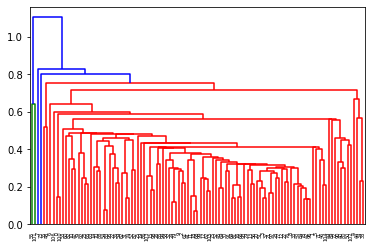

In [53]:
# Lets check single linkage
mergings = linkage(dat3_1, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

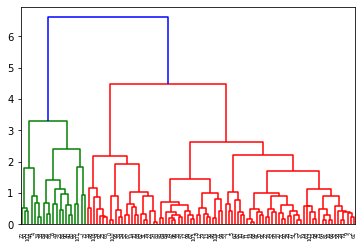

In [54]:
# Lets check complete linkage
mergings = linkage(dat3_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [55]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0])

In [56]:
dat3_1.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
2,-0.459260,-0.678794,0.967852,-0.176389
4,0.648777,-1.026498,-0.244170,-0.267513
6,-0.334274,-1.279033,0.190772,-0.501435
8,3.818137,0.262614,-0.297336,0.974405


In [57]:
dat_h = pd.concat([pca_df2.reset_index().drop('index', axis=1), pd.Series(cluster_labels).reset_index().drop('index', axis=1)], axis = 1)

In [58]:
dat_h.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterId']
dat_h.head()

,country,PC1,PC2,PC3,PC4,ClusterId
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,-0.334274,-1.279033,0.190772,-0.501435,1
4,Austria,3.818137,0.262614,-0.297336,0.974405,2


In [59]:
dat6 = pd.merge(country_df, dat_h, how = 'inner', on = 'country')
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterId
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334274,-1.279033,0.190772,-0.501435,1
4,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,3.818137,0.262614,-0.297336,0.974405,2


In [60]:
dat6.ClusterId.value_counts()

1    63
0    23
2    21
Name: ClusterId, dtype: int64

In [61]:
dat6.groupby('ClusterId')[['gdpp','child_mort','income']].mean()

,gdpp,child_mort,income
ClusterId,,,
0,2152.739130,68.478261,4650.869565
1,5879.873016,24.561905,11227.777778
2,30957.142857,5.738095,36833.333333


In [64]:
#From the above we can see that cluster 0 has less gdpp, more child_mort and less income compared to other clusters

In [69]:
under_dev_kmeans = dat5[(dat5['child_mort']>63.651613)&(dat5['gdpp']<2072.161290)&(dat5['income']<4450.000000)]

In [70]:
under_dev_kmeans.sort_values(['child_mort','gdpp','income'],ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
65,Mauritania,97.4,608.400,52.9200,734.400,3320,18.90,68.2,4.98,1200,0
74,Pakistan,92.1,140.400,22.8800,201.760,4280,10.90,65.3,3.85,1040,0
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0
59,Liberia,89.3,62.457,38.5860,302.802,700,5.47,60.8,5.02,327,0
22,Comoros,88.2,126.885,34.6819,397.573,1410,3.87,65.9,4.75,769,0
100,Uganda,81.0,101.745,53.6095,170.170,1540,10.60,56.8,6.15,595,0
36,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,0
57,Lao,78.9,403.560,50.9580,562.020,3980,9.20,63.8,3.15,1140,0
92,Sudan,76.7,291.560,93.5360,254.560,3370,19.60,66.3,4.88,1480,0
39,Ghana,74.7,386.450,68.3820,601.290,3060,16.60,62.2,4.27,1310,0


In [71]:
under_dev_h = dat6[(dat6['child_mort']>68.478261)&(dat6['gdpp']<2152.739130)&(dat6['income']<4650.869565)]

In [72]:
under_dev_h.sort_values(['child_mort','gdpp','income'],ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterId
65,Mauritania,97.4,608.400,52.9200,734.400,3320,18.90,68.2,4.98,1200,-2.115166,1.044043,0.591794,0.192237,0
74,Pakistan,92.1,140.400,22.8800,201.760,4280,10.90,65.3,3.85,1040,-1.862362,0.567761,-0.104180,-0.005943,0
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,0
59,Liberia,89.3,62.457,38.5860,302.802,700,5.47,60.8,5.02,327,-2.258788,0.934273,-0.765320,0.103324,0
22,Comoros,88.2,126.885,34.6819,397.573,1410,3.87,65.9,4.75,769,-1.949935,0.605858,-0.770259,0.087001,0
100,Uganda,81.0,101.745,53.6095,170.170,1540,10.60,56.8,6.15,595,-2.622069,1.462459,-0.409204,0.272634,0
36,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,-2.105662,0.825765,-0.750258,0.221167,0
57,Lao,78.9,403.560,50.9580,562.020,3980,9.20,63.8,3.15,1140,-1.637660,0.239648,-0.213413,-0.180128,0
92,Sudan,76.7,291.560,93.5360,254.560,3370,19.60,66.3,4.88,1480,-2.017409,0.848743,0.697120,0.147532,0
39,Ghana,74.7,386.450,68.3820,601.290,3060,16.60,62.2,4.27,1310,-2.002446,0.751031,0.368342,-0.008975,0


### The list of countries which need aid are: Mauritania, Pakistan, Afghanistan, Liberia, Comoros, Uganda, Gambia, Lao, Sudan and Ghana